In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import yaml
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import cv2

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image as image
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

In [25]:
try:
    with open ("../config.yaml", 'r') as file:
        config = yaml.safe_load(file)
except Exception as e:
    print('Error reading the config file')

In [2]:
model = tf.keras.models.load_model('../models/model5.model')

In [3]:
generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

train = generator_train.flow_from_directory('../data/raw/Training', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('../data/raw/Testing', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [4]:
preds = model.predict_generator(test)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

[0 2 1 ... 1 1 2]


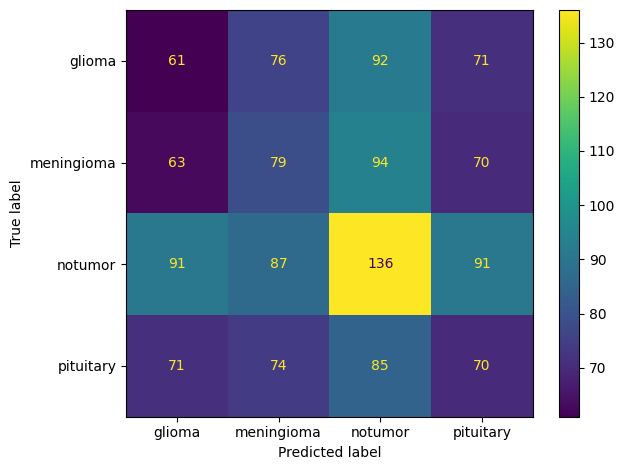

In [5]:
g_dict = test.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test.classes, y_pred)
display_cm = ConfusionMatrixDisplay(cm, display_labels=classes)
display_cm.plot()
plt.tight_layout()
plt.show()

In [10]:
model2 = tf.keras.models.load_model('../models/model3.model')

In [11]:
generator_train2 = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test2 = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


train2 = generator_train2.flow_from_directory('../data/raw/Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test2 = generator_test2.flow_from_directory('../data/raw/Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [12]:
preds2 = model2.predict_generator(test2)
y_pred2 = np.argmax(preds2, axis=1)
print(y_pred2)

[1 2 2 ... 2 1 2]


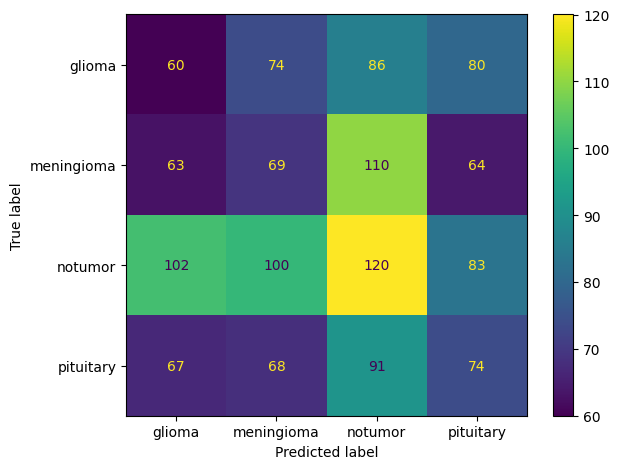

In [13]:
g_dict2 = test2.class_indices
classes2 = list(g_dict.keys())

# Confusion matrix
cm2 = confusion_matrix(test2.classes, y_pred2)
display_cm2 = ConfusionMatrixDisplay(cm2, display_labels=classes2)
display_cm2.plot()
plt.tight_layout()
plt.show()

In [26]:
data_dir = (config['data']['clean']+'train')
categories = ['notumor', 'tumor']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) 

In [34]:
model1_bin = tf.keras.models.load_model('../models/binary_models/model1_bin.model')

In [40]:
generator_train3 = ImageDataGenerator(featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test3 = ImageDataGenerator(featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)



train3 = generator_train3.flow_from_directory(config['data']['clean']+'train', target_size=(64,64),
                                              batch_size=32, class_mode= "binary", color_mode='grayscale')

test3 = generator_test3.flow_from_directory(config['data']['clean']+'test', target_size=(64,64),
                                              batch_size=32, class_mode= "binary", color_mode='grayscale')

Found 14066 images belonging to 2 classes.
Found 6026 images belonging to 2 classes.


In [41]:
preds3 = model1_bin.predict_generator(test3)
y_pred3 = np.argmax(preds3, axis=1)
print(y_pred3)

[0 0 0 ... 0 0 0]


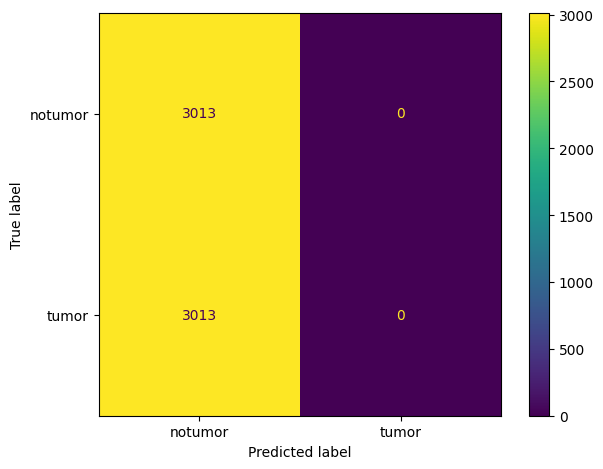

In [37]:
g_dict3 = test3.class_indices
classes3 = list(g_dict3.keys())

# Confusion matrix
cm3 = confusion_matrix(test3.classes, y_pred3)
display_cm3 = ConfusionMatrixDisplay(cm3, display_labels=classes3)
display_cm3.plot()
plt.tight_layout()
plt.show()